In [1]:
import sys

In [2]:
sys.path.insert(0, '/cmmc/ptmp/zora/software/assyst-nodes')
sys.path.insert(0, '/cmmc/ptmp/zora/software/pyiron_core.pyiron_workflow')
sys.path.insert(0, '/cmmc/ptmp/zora/software/pyironflow')

In [3]:
from pyiron_core.pyiron_workflow import Workflow

In [4]:
# import assyst_nodes
# from assyst_nodes.assyst import make_assyst

In [11]:
from assyst_nodes.assyst.calculators import (
    GenericOptimizerSettings,
    M3gnetConfig,
    Relax,
)
from assyst_nodes.assyst.plot import PlotSPG
from assyst_nodes.assyst.structures import SpaceGroupInput, SpaceGroupSampling


def make_assyst(name, delete_existing_savefiles=False):
    wf = Workflow(name, delete_existing_savefiles=delete_existing_savefiles)
    if wf.has_saved_content():
        return wf
    inp = SpaceGroupInput()
    spg = SpaceGroupSampling(inp)
    plotspg = PlotSPG(spg)

    calc_config = M3gnetConfig()
    optimizer_settings = GenericOptimizerSettings()
    
    volume_relax = Relax().for_node(mode="volume", calculator=calc_config, opt=optimizer_settings, structure=spg, iter_on="structure", output_as_dataframe=False)
    full_relax = Relax().for_node(mode="full", calculator=calc_config, opt=optimizer_settings, iter_on="structure", output_as_dataframe=False)
    full_relax.inputs.structure = volume_relax.outputs.relaxed_structure

    wf.input = inp
    wf.sampling = spg
    wf.plotspg = plotspg
    
    wf.calc_config = calc_config
    wf.optimizer_settings = optimizer_settings
    wf.volume_relax = volume_relax
    wf.full_relax = full_relax

    wf.inputs_map = {
        'input__elements': 'elements',
        'input__max_atoms': 'max_atoms',
        'input__stoichiometry': 'stoichiometry',
        'input__spacegroups': 'spacegroups',
        'input__min_dist': 'min_dist',
        'calc_config__model': None,
        'volume_relax__mode': None,
        'full_relax__mode': None,
    }
    wf.outputs_map = {
        'sampling__structures': 'crystals',
        'volume_relax__relaxed_structure': 'volmin',
        'full_relax__relaxed_structure': 'allmin',
        'volume_relax__structure': None,
        'full_relax__structure': None,
    }

    return wf

In [12]:
wf = make_assyst('ASSYST', delete_existing_savefiles=True)

In [14]:
wf.inputs.elements = ['Mg','Ca']
wf.inputs.stoichiometry = [(2,1)]

Spacegroups:   0%|          | 0/230 [00:00<?, ?it/s]

       Step     Time          Energy          fmax
LBFGS:    0 17:21:50       -3.801569        2.236988
LBFGS:    1 17:21:50       -4.003106        1.962966
LBFGS:    2 17:21:50       -4.611053        0.514681


/cmmc/ptmp/pyironhb/mambaforge/envs/pyiron_mpie_cmti_2025-02-17/lib/python3.11/site-packages/matgl/apps/pes.py:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.element_refs = AtomRef(property_offset=torch.tensor(element_refs, dtype=matgl.float_th))
/cmmc/ptmp/pyironhb/mambaforge/envs/pyiron_mpie_cmti_2025-02-17/lib/python3.11/site-packages/matgl/apps/pes.py:75: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.register_buffer("data_mean", torch.tensor(data_mean, dtype=matgl.float_th))
/cmmc/ptmp/pyironhb/mambaforge/envs/pyiron_mpie_cmti_2025-02-17/lib/python3.11/site-packages/matgl/apps/pes.py:76: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.

LBFGS:    3 17:21:50       -4.667755        0.061863
LBFGS:    4 17:21:50       -4.668879        0.015483
LBFGS:    5 17:21:50       -4.668954        0.000132
       Step     Time          Energy          fmax
LBFGS:    0 17:21:50        0.639242        2.163743
LBFGS:    1 17:21:50        0.452522        1.870659
LBFGS:    2 17:21:50       -0.345817        1.051335
LBFGS:    3 17:21:50       -0.779350        0.632832
LBFGS:    4 17:21:50       -1.094881        0.238288
LBFGS:    5 17:21:50       -1.408516        0.707076
LBFGS:    6 17:21:50       -1.023473        0.500565
LBFGS:    7 17:21:50       -0.669372        0.582483
LBFGS:    8 17:21:50       -1.023473        0.500565
LBFGS:    9 17:21:50       -1.444093        0.625390
LBFGS:   10 17:21:50       -1.023473        0.500565
       Step     Time          Energy          fmax
LBFGS:    0 17:21:50       -1.303880        3.362161
LBFGS:    1 17:21:50       -1.753251        2.852990
LBFGS:    2 17:21:50       -2.806172        1.0340

/cmmc/ptmp/pyironhb/mambaforge/envs/pyiron_mpie_cmti_2025-02-17/lib/python3.11/site-packages/matgl/apps/pes.py:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.element_refs = AtomRef(property_offset=torch.tensor(element_refs, dtype=matgl.float_th))
/cmmc/ptmp/pyironhb/mambaforge/envs/pyiron_mpie_cmti_2025-02-17/lib/python3.11/site-packages/matgl/apps/pes.py:75: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.register_buffer("data_mean", torch.tensor(data_mean, dtype=matgl.float_th))
/cmmc/ptmp/pyironhb/mambaforge/envs/pyiron_mpie_cmti_2025-02-17/lib/python3.11/site-packages/matgl/apps/pes.py:76: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.

LBFGS:    3 17:21:58       -5.296922        0.366300
LBFGS:    4 17:21:58       -5.331864        0.087324
LBFGS:    5 17:21:58       -5.334151        0.016216
LBFGS:    6 17:21:58       -5.334199        0.005045
       Step     Time          Energy          fmax
LBFGS:    0 17:21:59       -1.023473        5.607514
LBFGS:    1 17:21:59       -1.576087        5.154487
LBFGS:    2 17:21:59       -2.613068        2.129246
LBFGS:    3 17:21:59       -3.049098        2.233866
LBFGS:    4 17:21:59       -2.587870        2.133533
LBFGS:    5 17:21:59       -1.370206        5.152014
LBFGS:    6 17:21:59       -2.678390        2.111997
LBFGS:    7 17:21:59       -3.458553        2.061179
LBFGS:    8 17:21:59       -2.666100        2.115999
LBFGS:    9 17:21:59       -1.146417        5.140078
LBFGS:   10 17:21:59       -2.673872        2.415819
       Step     Time          Energy          fmax
LBFGS:    0 17:21:59       -2.988264        0.268665
LBFGS:    1 17:21:59       -2.989693        0.2748

{'crystals': [Atoms(symbols='Mg2Ca', pbc=True, cell=[[7.103788678492892, 1.951788781884132, 5.990109470323853], [0.0, 2.7515682131617525, 0.845525644051217], [0.0, 0.0, 3.096170792344603]]),
  Atoms(symbols='Mg2Ca', pbc=True, cell=[[3.491642270692834, -3.305572714302089, -1.3666722523033237], [0.0, 4.720383932528049, -1.9647107646892934], [0.0, 0.0, 5.118179878727841]]),
  Atoms(symbols='Mg2Ca', pbc=True, cell=[[4.481201889813186, 4.353263374017075e-16, -2.142415877754328], [0.0, 6.162471351965099, 3.7734254080106603e-16], [0.0, 0.0, 2.651987539858943]]),
  Atoms(symbols='Mg2Ca', pbc=True, cell=[[7.051491936168253, 4.111265420356345e-16, 0.3457576998544669], [0.0, 3.4322151050695893, 2.1016256212043344e-16], [0.0, 0.0, 2.7523841339764483]]),
  Atoms(symbols='Mg2Ca', pbc=True, cell=[[5.3473190193229705, 3.2763027437245174e-16, -0.0032883996857621827], [0.0, 3.2064736117430543, 1.9633988225857923e-16], [0.0, 0.0, 5.105903077858903]]),
  Atoms(symbols='Mg2Ca', pbc=True, cell=[[3.026712290

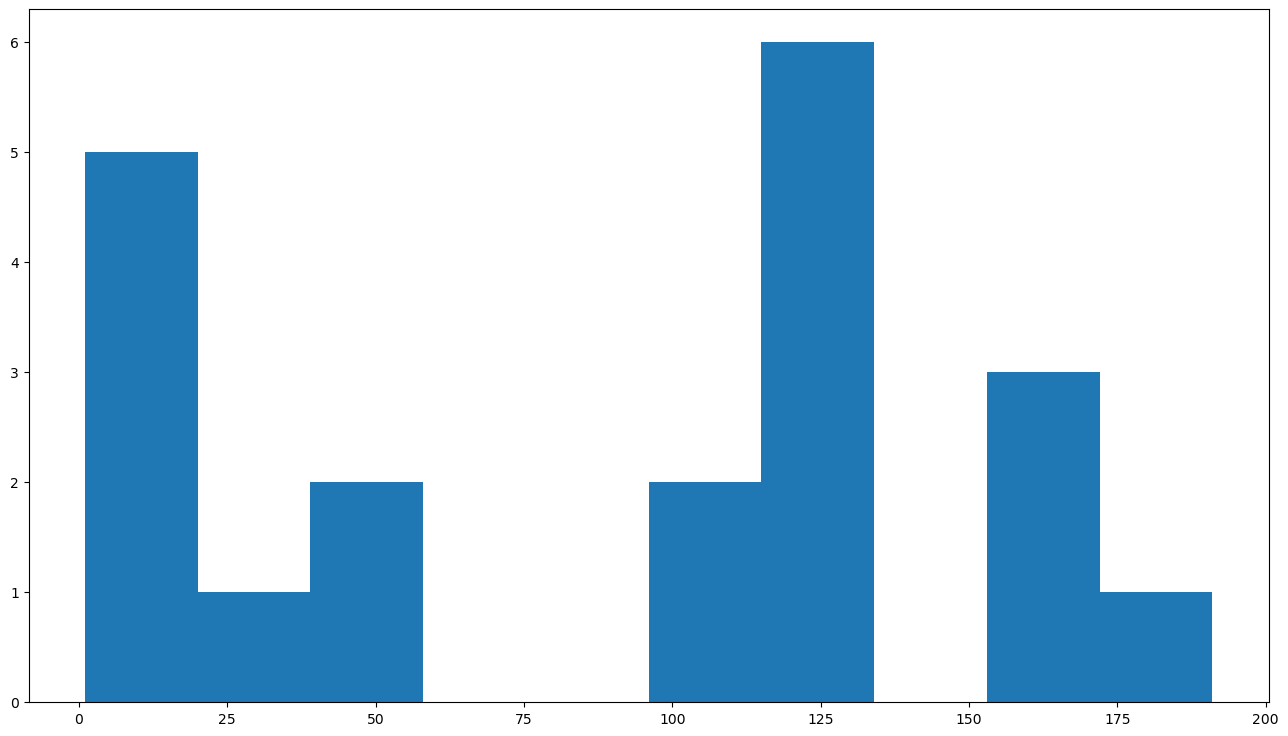

In [15]:
wf.run()

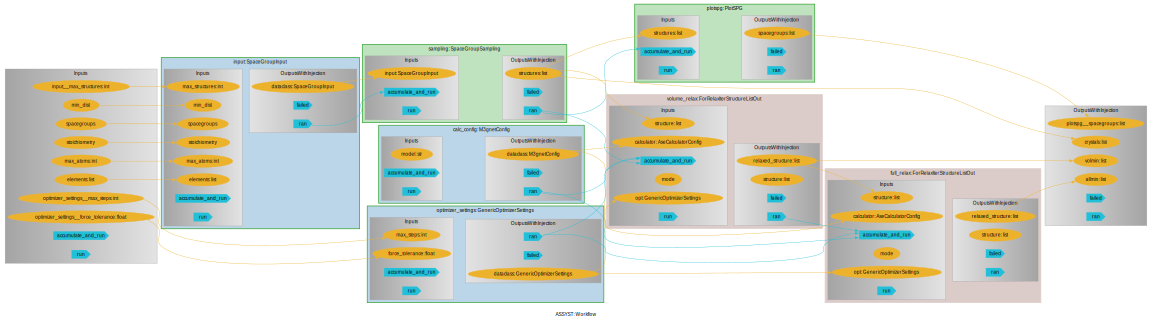

In [16]:
wf.draw(size=(16,8))

In [12]:
wf.save()

In [13]:
wf2 = Workflow('ASSYST')

Saving and reloading works, but somehow not with the gui.

In [14]:
from pyiron_core.pyironflow import PyironFlow

In [15]:
pf = PyironFlow([wf2])

In [19]:
pf = PyironFlow([wf])

In [20]:
pf.gui